In [54]:
import pandas as pd
import numpy as np

%matplotlib inline

In [55]:
dataset_path = "../../datasets/palmerpenguins/penguins.csv"

In [56]:
df = pd.read_csv(dataset_path)

In [57]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [58]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [59]:
df[df.isna().sum(axis=1) > 0]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [60]:
columns = ['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df = df[columns].dropna()

In [64]:
df.isna().sum()

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [65]:
df.species.value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

## Exploration

In [46]:
species_map = {species: i for i, species in enumerate(df.species.unique())}

In [47]:
df['species_i'] = [species_map[species] for species in df.species]

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

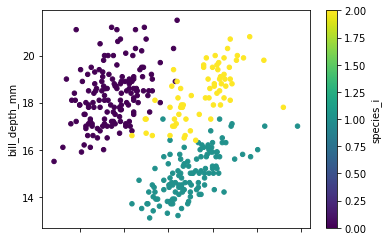

In [48]:
df.plot(kind="scatter", x="bill_length_mm", y="bill_depth_mm", c='species_i', colormap='viridis')

## Building a Model

In [83]:
from sklearn.tree import DecisionTreeClassifier
import pickle

In [73]:
model = DecisionTreeClassifier()

In [74]:
df.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [75]:
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [76]:
y = df.species

In [77]:
model.fit(X, y)

DecisionTreeClassifier()

In [78]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


In [79]:
model.predict([[39.1, 18.7, 181, 3750]])

/Users/anand/.venv/python310/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Adelie'], dtype=object)

In [85]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

## TODOs

* Do test/train split of the data
* Show the training accuracy metrics